#Controlling figure aesthetics
Drawing attractive figures is important. When making figures for yourself, as you explore a dataset, it’s nice to have plots that are pleasant to look at. Visualizations are also central to communicating quantitative insights to an audience, and in that setting it’s even more necessary to have figures that catch the attention and draw a viewer in.

Matplotlib is highly customizable, but it can be hard to know what settings to tweak to achieve an attractive plot. Seaborn comes with a number of customized themes and a high-level interface for controlling the look of matplotlib figures.

In [30]:
%matplotlib inline

In [31]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
np.random.seed(sum(map(ord, "aesthetics"))) ## np.random.seed 는 숫자를 인자로 받는다. 

In [32]:
np.random.seed(10) ## R 의 set.seed 와 같은 기능으로 생각됨.

In [33]:
sum(map(ord, "aesthetics"))

1069

In [34]:
sum([1,2,3,4,5]) ## sum은 list 내의 integer나 float의 합을 구하는 함수다. 

15

In [35]:
map(ord, "aesthetics") ## map 은 함수와, string을 인자로 받는다.

In [36]:
type("aesthetics")

str

In [37]:
list(map(ord, "aesthetics"))

[97, 101, 115, 116, 104, 101, 116, 105, 99, 115]

In [38]:
ord, "aesthetics"

(<function ord>, 'aesthetics')

In [40]:
#?ord

ord는 문자를 아스키코드로 바꾸는 함수

In [44]:
#?map

In [45]:
list(map(lambda x: x ** 2, range(5)))

[0, 1, 4, 9, 16]

간단한 함수를 정의하여, seaborn 을 통해서 수정이 가능한 그래프를 만들수 있게 해 본다.

In [46]:
def sinplot(flip=1):
    x = np.linspace(0, 14, 100) ## 0에서 14까지 100 구간으로 나눈 리스트를 return 한다.
    for i in range(1, 7):
        plt.plot(x, np.sin(x + i * .5) * (7 - i) * flip)

In [49]:
x = np.linspace(0, 14, 100)
print(x)

[  0.           0.14141414   0.28282828   0.42424242   0.56565657
   0.70707071   0.84848485   0.98989899   1.13131313   1.27272727
   1.41414141   1.55555556   1.6969697    1.83838384   1.97979798
   2.12121212   2.26262626   2.4040404    2.54545455   2.68686869
   2.82828283   2.96969697   3.11111111   3.25252525   3.39393939
   3.53535354   3.67676768   3.81818182   3.95959596   4.1010101
   4.24242424   4.38383838   4.52525253   4.66666667   4.80808081
   4.94949495   5.09090909   5.23232323   5.37373737   5.51515152
   5.65656566   5.7979798    5.93939394   6.08080808   6.22222222
   6.36363636   6.50505051   6.64646465   6.78787879   6.92929293
   7.07070707   7.21212121   7.35353535   7.49494949   7.63636364
   7.77777778   7.91919192   8.06060606   8.2020202    8.34343434
   8.48484848   8.62626263   8.76767677   8.90909091   9.05050505
   9.19191919   9.33333333   9.47474747   9.61616162   9.75757576
   9.8989899   10.04040404  10.18181818  10.32323232  10.46464646
  10.606060

np.linspace 를 통해서, 0 에서 14 의 숫자를 100 등분 한 숫자를 반환한다.

아래 figure 가 일반적인 matplotlib에서 sine graph 를 그렸을 때의 그림이다.

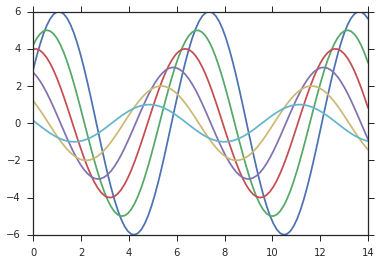

In [50]:
sinplot()

간단하게 seaborn 모듈을 import 함으로써 그래프는 아래와 같이 변화하게 된다.

In [52]:
import seaborn as sns

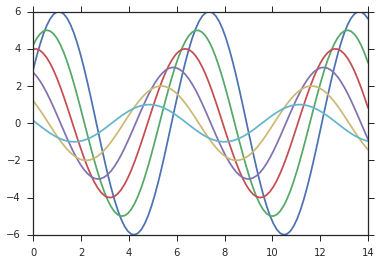

In [54]:
sinplot()

The seaborn defaults break from the MATLAB inspired aesthetic of matplotlib to plot in more muted colors over a light gray background with white grid lines. We find that the grid aids in the use of figures for conveying quantitative information – in almost all cases, figures should be preferred to tables. The white-on-gray grid that is used by default avoids being obtrusive. The grid is particularly useful in giving structure to figures with multiple facets, which is central to some of the more complex tools in the library.

Seaborn splits matplotlib parameters into two independent groups. The first group sets the aesthetic style of the plot, and the second scales various elements of the figure so that it can be easily incorporated into different contexts.

The interface for manipulating these parameters are two pairs of functions. To control the style, use the axes_style() and set_style() functions. To scale the plot, use the plotting_context() and set_context() functions. In both cases, the first function returns a dictionary of parameters and the second sets the matplotlib defaults.

##Styling figures with axes_style() and set_style()
There are five preset seaborn themes: darkgrid, whitegrid, dark, white, and ticks. They are each suited to different applications and personal preferences. The default theme is darkgrid. As mentioned above, the grid helps the plot serve as a lookup table for quantitative information, and the white-on grey helps to keep the grid from competing with lines that represent data. The whitegrid theme is similar, but it is better suited to plots with heavy data elements:

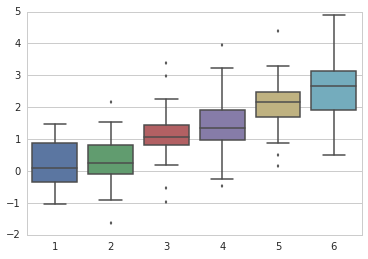

In [55]:
sns.set_style("whitegrid")
data = np.random.normal(size=(20,6)) + np.arange(6) / 2
sns.boxplot(data);

In [56]:
np.random.normal(size=(20,6))

array([[-0.57311336, -1.32044755,  1.23620533,  2.46532508,  1.38323223,
         0.34623312],
       [ 1.02251611,  0.16681027,  1.65671662,  0.66788961, -0.22994664,
        -1.12955119],
       [-0.6399626 ,  0.31383052, -1.22583598, -0.22179314,  1.33992631,
         0.02930971],
       [ 1.98538575,  1.4471656 , -0.28762941, -1.35931057, -0.04804133,
        -0.48078734],
       [ 0.37775309,  1.61440797, -1.12310404, -0.38872795,  0.33234995,
         1.13497317],
       [ 0.51071441,  0.41429764,  1.34454942,  0.49351532, -0.23700418,
         0.05728515],
       [-0.70707145,  0.54666484,  0.94250041, -2.97959677,  1.21814885,
        -0.05652072],
       [ 0.46088845,  0.66237401, -2.29510333, -1.19592931, -0.33310116,
        -0.79139077],
       [ 0.27417278, -0.51490992, -1.7110712 ,  0.61229731,  1.10012937,
         0.56435253],
       [-0.71279944, -0.26085948,  0.54842807,  0.60319905,  1.00686114,
        -0.29442601],
       [-1.42088052, -0.67894677,  0.53388481,  0.

In [57]:
np.arange(6)

array([0, 1, 2, 3, 4, 5])

For many plots, (especially for settings like talks, where you primarily want to use figures to provide impressions of patterns in the data), the grid is less necessary.

In [58]:
sns.set_style("dark")

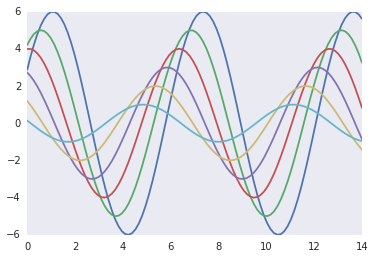

In [59]:
sinplot()

In [60]:
sns.set_style("white")

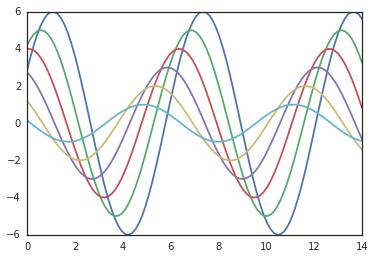

In [61]:
sinplot()

Sometimes you might want to give a little extra structure to the plots, which is where ticks come in handy:

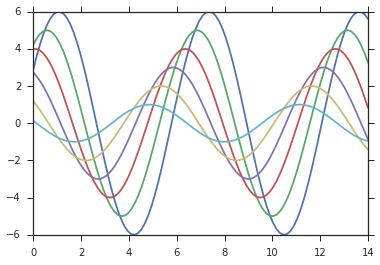

In [62]:
sns.set_style("ticks")
sinplot()

##Removing spines with despine()
Both the white and ticks styles can benefit from removing the top and right axes spines, which are not needed. It’s impossible to do this through the matplotlib parameters, but you can call the seaborn function despine() to remove them:

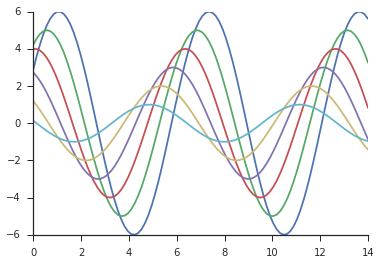

In [63]:
sinplot()
sns.despine()

Some plots benefit from offsetting the spines away from the data, which can also be done when calling despine(). When the ticks don’t cover the whole range of the axis, the trim parameter will limit the range of the surviving spines.

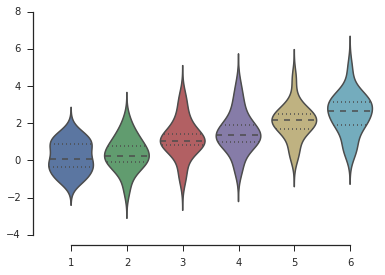

In [64]:
f, ax = plt.subplots()
sns.violinplot(data)
sns.despine(offset=10, trim=True);

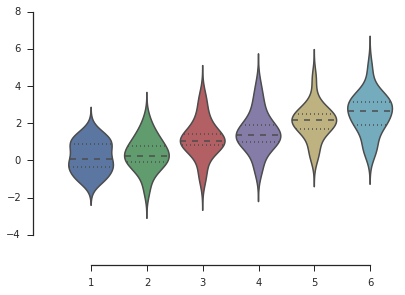

In [65]:
sns.violinplot(data)
sns.despine(offset=30, trim=True);

You can also control which spines are removed with additional arguments to despine():

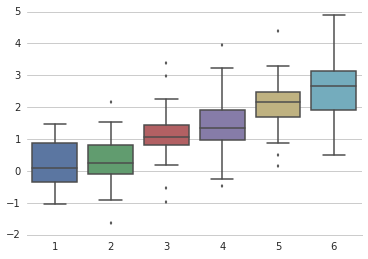

In [66]:
sns.set_style("whitegrid")
sns.boxplot(data, color = 'deep')
sns.despine(left=True)

##Temporarily setting figure style
Although it’s easy to switch back and forth, you can also use the axes_style() function in a with statement to temporarily set plot parameters. This also allows you to make figures with differently-styled axes:

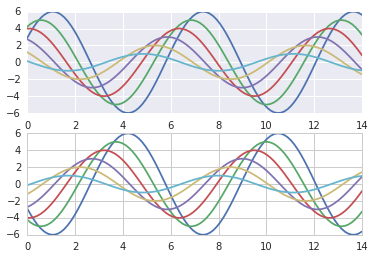

In [67]:
with sns.axes_style("darkgrid"):
    plt.subplot(211)        ## 열, 행, x번째
    sinplot()
plt.subplot(212)
sinplot(-1)

## Overriding elements of the seaborn styles
If you want to customize the seaborn styles, you can pass a dictionary of parameters to the rc argument of axes_style() and set_style(). Note that you can only override the parameters that are part of the style definition through this method. (However, the higher-level set() function takes a dictionary of any matplotlib parameters).

If you want to see what parameters are included, you can just call the function with no arguments, which will return the current settings:

In [68]:
sns.axes_style()

{'axes.axisbelow': True,
 'axes.edgecolor': '.8',
 'axes.facecolor': 'white',
 'axes.grid': True,
 'axes.labelcolor': '.15',
 'axes.linewidth': 1,
 'font.family': ['sans-serif'],
 'font.sans-serif': ['Arial',
  'Liberation Sans',
  'Bitstream Vera Sans',
  'sans-serif'],
 'grid.color': '.8',
 'grid.linestyle': '-',
 'image.cmap': 'Greys',
 'legend.frameon': False,
 'legend.numpoints': 1,
 'legend.scatterpoints': 1,
 'lines.solid_capstyle': 'round',
 'text.color': '.15',
 'xtick.color': '.15',
 'xtick.direction': 'out',
 'xtick.major.size': 0,
 'xtick.minor.size': 0,
 'ytick.color': '.15',
 'ytick.direction': 'out',
 'ytick.major.size': 0,
 'ytick.minor.size': 0}

You can then set different versions of these parameters:

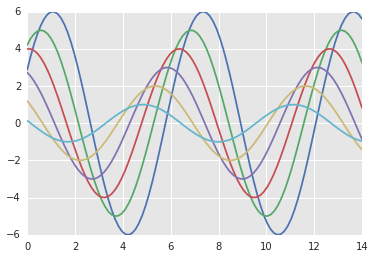

In [69]:
sns.set_style("darkgrid", {"axes.facecolor": ".9"})
sinplot()

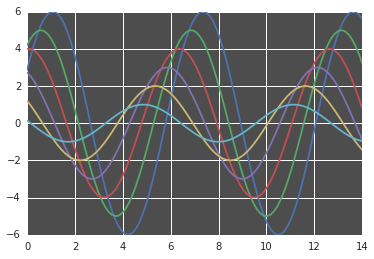

In [70]:
sns.set_style("darkgrid", {"axes.facecolor": ".3"})
sinplot()

## Scaling plot elements with plotting_context() and set_context()
A separate set of parameters control the scale of plot elements, which should let you use the same code to make plots that are suited for use in settings where larger or smaller plots are appropriate.

First let’s reset the default parameters by calling set():

In [71]:
sns.set()

The four preset contexts, in order of relative size, are paper, notebook, talk, and poster. The notebook style is the default, and was used in the plots above.

노트북 스타일이 디폴트!

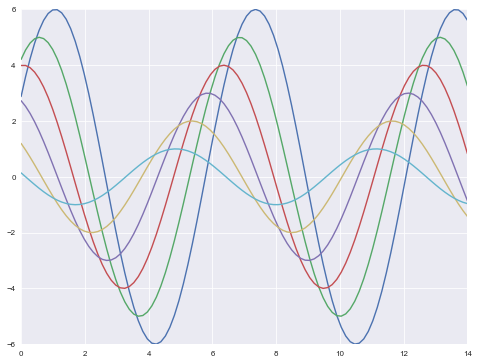

In [72]:
sns.set_context("paper") ## 논문이나 책
plt.figure(figsize=(8, 6))
sinplot()

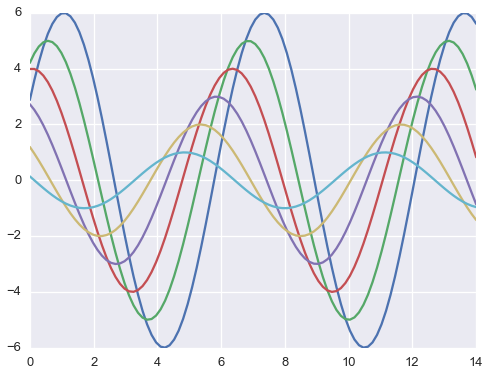

In [73]:
sns.set_context("talk") ## 프레젠테이션
plt.figure(figsize=(8, 6))
sinplot()

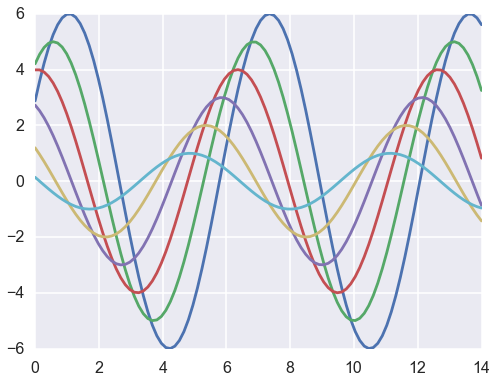

In [74]:
sns.set_context("poster") ## 포스터 스타일
plt.figure(figsize=(8, 6))
sinplot()

Most of what you now know about the style functions should transfer to the context functions.

You can call set_context() with one of these names to set the parameters, and you can override the parameters by providing a dictionary of parameter values.

You can also independently scale the size of the font elements when changing the context. (This option is also available through the top-level set() function).

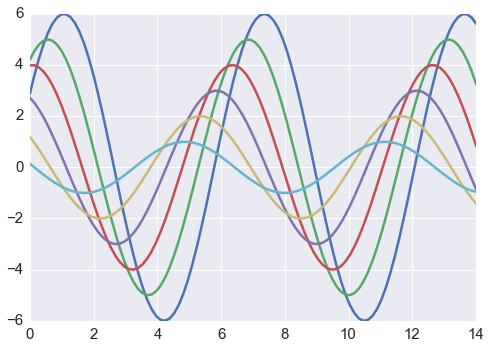

In [75]:
sns.set_context("notebook", font_scale=1.5, rc={"lines.linewidth": 2.5})
sinplot()

Similarly (although it might be less useful), you can temporarily control the scale of figures nested under a with statement.

Both the style and the context can be quickly configured with the set() function. This function also sets the default color palette, but that will be covered in more detail in the next section of the tutorial.